In [1]:
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import statsmodels.api as sm

## Time Series Mini Project

### Acquire

In [2]:
## <-- getting our dataframe

df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [3]:
df.head() ## <-- looking at our dataframe

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
df.info() ## <-- looking at our column values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [5]:
df.dt ## <-- seeing if we have a datetime object we do not

0         1743-11-01
1         1743-12-01
2         1744-01-01
3         1744-02-01
4         1744-03-01
             ...    
577457    2013-05-01
577458    2013-06-01
577459    2013-07-01
577460    2013-08-01
577461    2013-09-01
Name: dt, Length: 577462, dtype: object

In [6]:
df.dt = pd.to_datetime(df.dt, format = '%Y-%m-%d') ## converting to date time

In [7]:
df.dt ## <-- quality assurance check

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: dt, Length: 577462, dtype: datetime64[ns]

In [8]:
df.Country.value_counts() ## <-- determining what location to pick

## I want to pick one with the most values

Croatia                                3239
Jersey                                 3239
Netherlands (Europe)                   3239
Iceland                                3239
Estonia                                3239
                                       ... 
Northern Mariana Islands               1329
Guam                                   1329
Heard Island And Mcdonald Islands       788
French Southern And Antarctic Lands     788
Antarctica                              764
Name: Country, Length: 243, dtype: int64

In [9]:
df.describe().T ## <-- looking at my numerical statistics

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,544811.0,17.193354,10.953966,-37.658,10.025,20.901,25.814,38.842
AverageTemperatureUncertainty,545550.0,1.019057,1.201930,0.052,0.323,0.571,1.206,15.003


#### Column Distributions

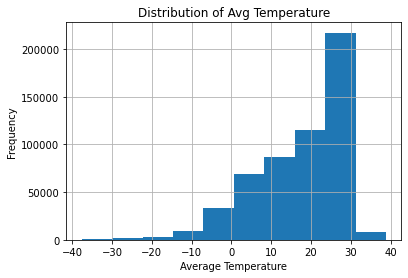

In [10]:
df.AverageTemperature.hist()
plt.title('Distribution of Avg Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()

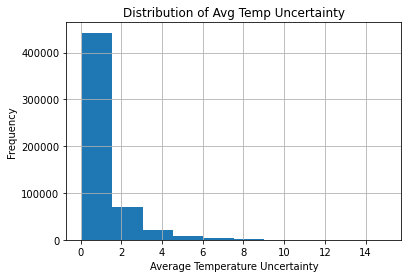

In [11]:
df.AverageTemperatureUncertainty.hist()
plt.title('Distribution of Avg Temp Uncertainty')
plt.xlabel('Average Temperature Uncertainty')
plt.ylabel('Frequency')
plt.show()

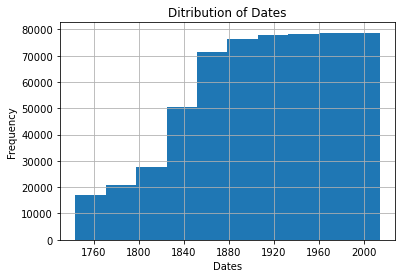

In [12]:
df.dt.hist()
plt.title('Ditribution of Dates')
plt.xlabel('Dates')
plt.ylabel('Frequency')
plt.show()

### Prepare

In [13]:
df.Country.value_counts() ## <-- Lets pick Netherlands 

## for our location

Croatia                                3239
Jersey                                 3239
Netherlands (Europe)                   3239
Iceland                                3239
Estonia                                3239
                                       ... 
Northern Mariana Islands               1329
Guam                                   1329
Heard Island And Mcdonald Islands       788
French Southern And Antarctic Lands     788
Antarctica                              764
Name: Country, Length: 243, dtype: int64

In [14]:
df = df[df.Country == "Netherlands (Europe)"] ## <-- narrowing down to the netherlands

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
364075,1743-11-01,7.606,1.746,Netherlands (Europe)
364076,1743-12-01,NaN,NaN,Netherlands (Europe)
364077,1744-01-01,NaN,NaN,Netherlands (Europe)
364078,1744-02-01,NaN,NaN,Netherlands (Europe)
364079,1744-03-01,NaN,NaN,Netherlands (Europe)


In [15]:
df.Country.value_counts() ## <-- quality assurance check

Netherlands (Europe)    3239
Name: Country, dtype: int64

In [16]:
df.shape ## <-- looking at our row shape before we check for nulls

(3239, 4)

In [17]:
df.isnull().sum() ## <-- looking at our null values

dt                                0
AverageTemperature               73
AverageTemperatureUncertainty    73
Country                           0
dtype: int64

73 null values is not very many compared to the 3239 rows of data in the dataframe. To make this easy I am going to drop the nulls and move forward.

In [18]:
df = df.dropna() ## <-- drop the nulls

df.isnull().sum() ## <-- quality assurance check

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

#### Column Distribution Part II

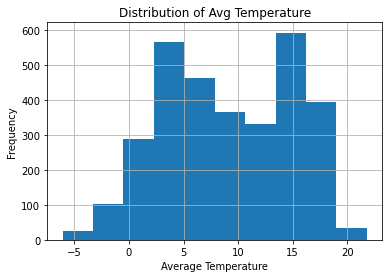

In [19]:
df.AverageTemperature.hist()
plt.title('Distribution of Avg Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()

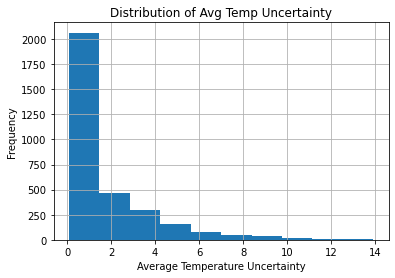

In [20]:
df.AverageTemperatureUncertainty.hist()
plt.title('Distribution of Avg Temp Uncertainty')
plt.xlabel('Average Temperature Uncertainty')
plt.ylabel('Frequency')
plt.show()

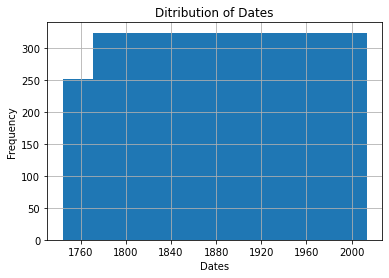

In [21]:
df.dt.hist()
plt.title('Ditribution of Dates')
plt.xlabel('Dates')
plt.ylabel('Frequency')
plt.show()

After looking in to Average Temperature Uncertainty and its definition. Given the goal of this project is to create a forecast for average temperature in the Netherlands I do not think it will bring and value and we are going to remove it from our dataframe before moving on to explore

In [22]:
df = df.drop(columns = 'AverageTemperatureUncertainty')
df.head()

,dt,AverageTemperature,Country
364075,1743-11-01,7.606,Netherlands (Europe)
364080,1744-04-01,7.986,Netherlands (Europe)
364081,1744-05-01,11.306,Netherlands (Europe)
364082,1744-06-01,14.475,Netherlands (Europe)
364083,1744-07-01,16.013,Netherlands (Europe)


In [23]:
## setting date as index and sorting for vis purposes

df = df.set_index('dt').sort_index() 

In [24]:
## making a year column 
df['year'] = df.index.year

In [25]:
df.head() ## taking a look at our nice clean dataframe :D

,AverageTemperature,Country,year
dt,,,
1743-11-01,7.606,Netherlands (Europe),1743
1744-04-01,7.986,Netherlands (Europe),1744
1744-05-01,11.306,Netherlands (Europe),1744
1744-06-01,14.475,Netherlands (Europe),1744
1744-07-01,16.013,Netherlands (Europe),1744


### Explore

#### Splitting Data (Human Split)

In [26]:
df.index.min(), df.index.max()

(Timestamp('1743-11-01 00:00:00'), Timestamp('2013-08-01 00:00:00'))

We are going to use the last 13 years as are test data set (when the measurements enter the 2000's period)

In [27]:
## choosing between 1751 & 1950 for train (starting at 1751 to remove some weird missing datapoints)
## choosing years between 1950 & 2000 for validate
## choosing the last 13 years when measurements enter 2000s 4 test

train = df.loc['1750':'1949'] 
validate = df.loc['1950':'1999'] 
test = df.loc['2000':] 

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2389 entries, 1750-01-01 to 1949-12-01
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AverageTemperature  2389 non-null   float64
 1   Country             2389 non-null   object 
 2   year                2389 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 74.7+ KB


In [29]:
train.head()

,AverageTemperature,Country,year
dt,,,
1750-01-01,1.509,Netherlands (Europe),1750
1750-02-01,5.598,Netherlands (Europe),1750
1750-03-01,7.711,Netherlands (Europe),1750
1750-04-01,8.225,Netherlands (Europe),1750
1750-05-01,12.223,Netherlands (Europe),1750


#### Plotting Splits

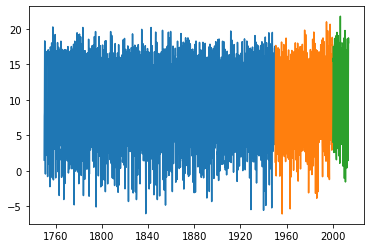

In [30]:
## plotting train and test

plt.plot(train.index, train.AverageTemperature)
plt.plot(validate.index, validate.AverageTemperature)
plt.plot(test.index, test.AverageTemperature)
plt.show()

This doesn't tell me much let's try again with resampling and aggregation

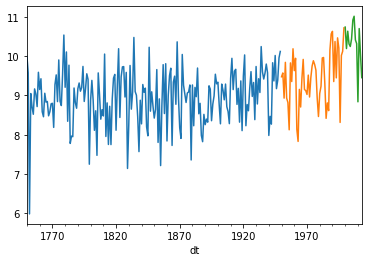

In [31]:
## plotting the resamples by a 3 year period 
## of all df's aggregating with mean

train.resample('Y').AverageTemperature.mean().plot()
validate.resample('Y').AverageTemperature.mean().plot()
test.resample('Y').AverageTemperature.mean().plot()
plt.show()

#### Exploring Train

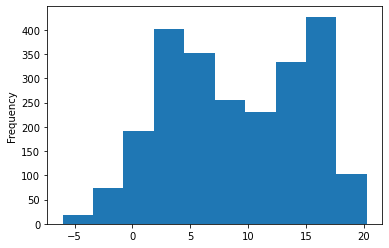

In [32]:
## looking at target variable distribution

train.AverageTemperature.plot.hist()
plt.show()

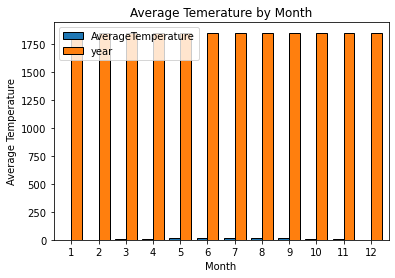

In [33]:
ax = train.groupby(train.index.month).mean().plot.bar(width=.8, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temerature by Month', xlabel='Month', ylabel='Average Temperature')
plt.show()

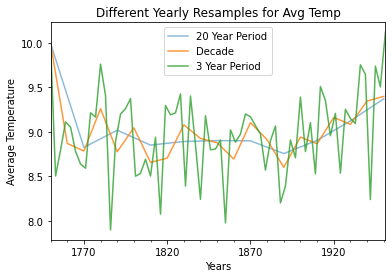

In [34]:
## Looking at the different aggregates using mean
train.AverageTemperature.resample('20Y').mean().plot(alpha=.5, label='20 Year Period')
train.AverageTemperature.resample('10Y').mean().plot(alpha=.8, label='Decade')
train.AverageTemperature.resample('3Y').mean().plot(alpha=.8, label='3 Year Period')
plt.xlabel('Years')
plt.ylabel('Average Temperature')
plt.title('Different Yearly Resamples for Avg Temp')
plt.legend()
plt.show()

#### Exploring Y (Yearly Average Temperatures)

In [35]:
y = train.resample('Y').AverageTemperature.mean()

In [36]:
y.isna().sum()

0

Plot the yearly difference. Observe whether temperatures vary drastically or have a smooth transition

In [37]:
y.describe()

count    200.000000
mean       8.952309
std        0.703209
min        5.987500
25%        8.521042
50%        9.017458
75%        9.427875
max       10.536417
Name: AverageTemperature, dtype: float64

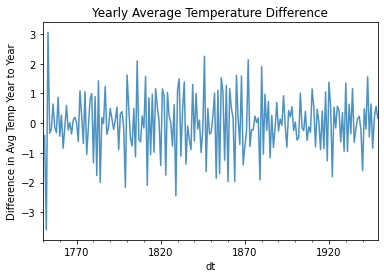

In [38]:
y.diff().plot(alpha = .8)
plt.title('Yearly Average Temperature Difference')
plt.ylabel('Difference in Avg Temp Year to Year')
plt.show()

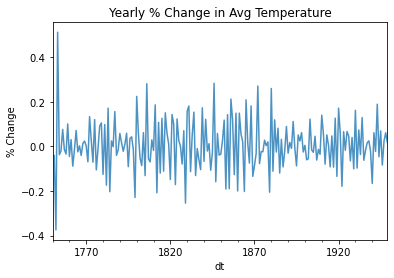

In [39]:
(y.diff() / y.shift()).plot(alpha = .8)
plt.title('Yearly % Change in Avg Temperature')
plt.ylabel('% Change')
plt.show()

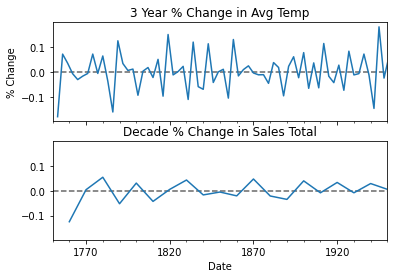

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

threeyr = y.resample('3Y').mean()
(threeyr.diff() / threeyr.shift()).plot(ax=ax1)
ax1.set(title='3 Year % Change in Avg Temp', ylabel='% Change', xlabel='')
ax1.hlines(0, *ax2.get_xlim(), color='black', alpha=.6, ls='--')

decade = y.resample('10Y').mean()
(decade.diff() / decade.shift()).plot(ax=ax2)
ax2.set(title='Decade % Change in Sales Total', 
        xlabel = 'Date')
ax2.hlines(0, *ax2.get_xlim(), color='black', alpha=.6, ls='--')

In [40]:
y.pct_change()

dt
1750-12-31         NaN
1751-12-31   -0.041620
1752-12-31   -0.374918
1753-12-31    0.511190
1754-12-31   -0.037834
                ...   
1945-12-31    0.069085
1946-12-31   -0.084131
1947-12-31    0.023264
1948-12-31    0.060616
1949-12-31    0.016431
Freq: A-DEC, Name: AverageTemperature, Length: 200, dtype: float64

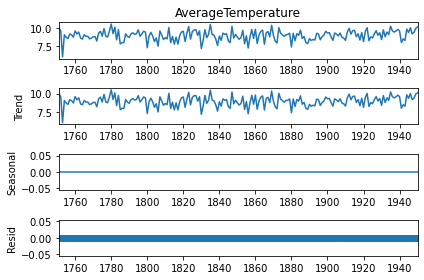

In [41]:
sm.tsa.seasonal_decompose(y).plot()
None

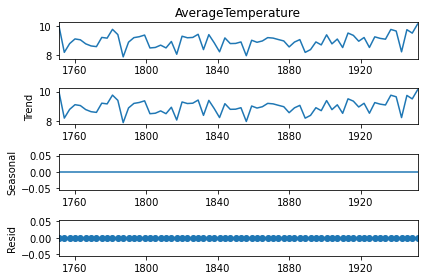

In [42]:
sm.tsa.seasonal_decompose(y.resample('3Y').mean()).plot()
None

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

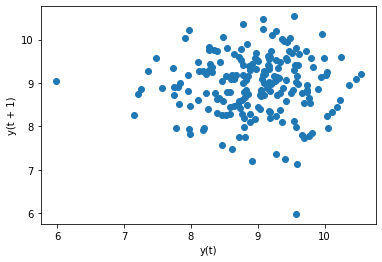

In [43]:
pd.plotting.lag_plot(y, 1)

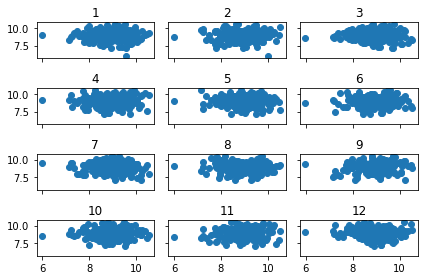

In [47]:
fig, axs = plt.subplots(4, 3, sharex=True, sharey=True)

for ax, lag in zip(axs.ravel(), range(1, 13)):
    pd.plotting.lag_plot(y, lag=lag, ax=ax)
    ax.set(title=lag, xlabel='', ylabel='')
    
fig.tight_layout()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

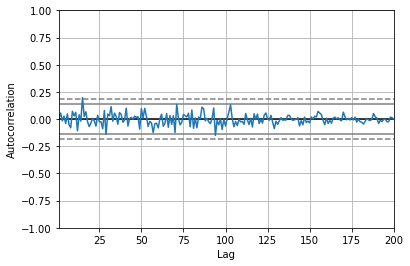

In [52]:
pd.plotting.autocorrelation_plot(y)